<a href="https://colab.research.google.com/github/Jay06eng/Machine-Learning/blob/main/Lab_3_Jay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today, we will work on the Titanic Dataset used for a machine learning competition in [Kaggle](https://www.kaggle.com/competitions/titanic/data?select=train.csv).

#General Instructions:

You are assigned to clean and preprocess the data.

#About the Data

It is important to fully understand the datasets we are working on. Here's the data dictionary for the Titanic DataSet.

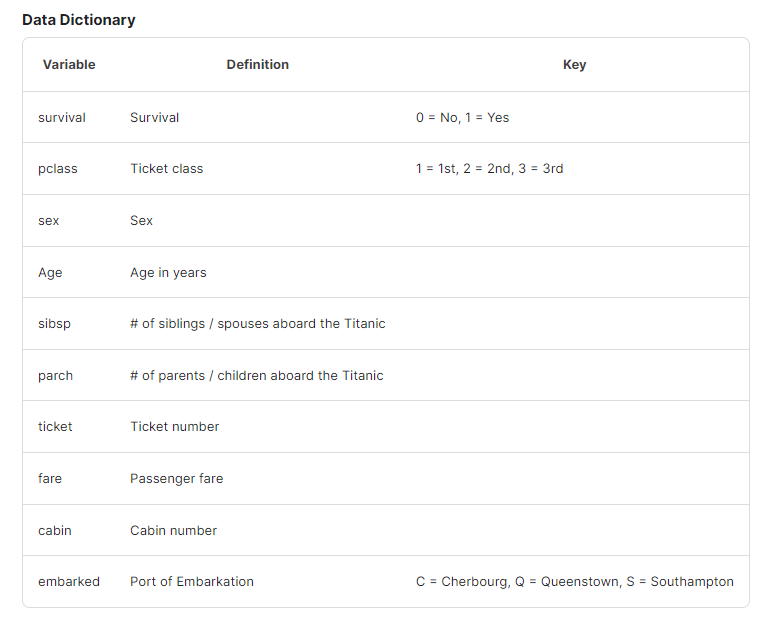

##**Variable Notes**


###pclass: A proxy for socio-economic status (SES)

1st = Upper<br>
2nd = Middle<br>
3rd = Lower<br>


###sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)<br>

###parch: The dataset defines family relations in this way...

Parent = mother, father <br>
Child = daughter, son, stepdaughter, stepson <br>
Some children travelled only with a nanny, therefore parch=0 for them. <br>



#1. IMPORT THE DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('TITANIC DATASET.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.shape
#Our dataframe has 891 rows and 12 columns

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


#2. CATEGORIZE THE DUMMY VARIABLES


A dummy variable is a binary variable used to represent categorical data in statistical analysis, typically taking the value 0 or 1 to indicate the absence or presence of a characteristic or condition. In this case, replace them with their actual values.

##2.1 Convert Pclass

In [ ]:
#The exercise is asking to create variable(s) for a
#categorical data set in a column for a binary value
#in preparation for our statistical analysis.
#Pclass = [1:1st, 2:2nd, 3:3rd]

#A new variable is created
#containing a dictionary

#use the drop replace function we
#have use in class
#this should be {'1st': 'Upper', '2nd': 'Middle', '3rd': 'Lower' }

#pclass_mapping = {1: '1st', 2: '2nd', 3: '3rd'}
#df['Pclass'] = df['Pclass'].map(pclass_mapping )
#df

In [ ]:
#Using dropna and replace
#I checked first if there are missing values

missing_Pclass = df['Pclass'].isnull().sum()
print(f'The missing values in the Pclass column are: {missing_Pclass}')


The missing values in the Pclass column are: 0


In [ ]:
df['Pclass'] = df['Pclass'].replace({1: 'Upper', 2: 'Middle', 3: 'Lower'}).astype('category')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Upper,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Lower,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Upper,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Lower,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Middle,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,Upper,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,Lower,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,Upper,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##2.2 Convert Survived

In [ ]:
#Survived = {Yes:1, No:0}

survived_mapping = {1: 'Yes', 0: 'No'}
df['Survived'] = df['Survived'].map(survived_mapping )
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2nd,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Yes,1st,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,No,3rd,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,Yes,1st,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##2.3 Convert Embarked

In [ ]:
#Embarked = [C:Cherbourg, Q:Queenstone, S:Southampton]

embarked_mapping = {'C':'Cherbourg', 'Q':'Queenstone', 'S':'Southampton'}
df['Embarked'] = df['Embarked'].map(embarked_mapping )
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,Yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,No,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2nd,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,Yes,1st,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
888,889,No,3rd,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
889,890,Yes,1st,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg


#3. HANDLING MISSING VALUES

##3.1 Determine how many missing values are in our dataset.

In [ ]:
#To determine missing values,
#I create a new variable missing_values
#and use isnull().sum()

missing_values = df.isnull().sum()
missing_values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#testing the difference in the result when
#I don't use .sum()

missing_values = df.isnull()
missing_values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


##3.2 Drop or Fill in the missing values with the following considerations in mind:

a. Cabin's missing value is a huge portion of the dataset. <br>
b. Age could be a good indicator or whether someone will survive this kind of disaster or not. <br>
c. We can't just assume someone's Port Embarkation. <br>

Now, as an analyst, decide if you want to drop columns/rows or fill in the missing values. Explain why you think your decision is good.


### ***Important note: find a way to handle the missing values one by one and do not just drop all.***

### .dropna() vs. .drop()


Use dropna() when you specifically want to remove rows or columns containing missing values.

Use drop() when you want to remove rows or columns based on specified labels, regardless of whether they contain missing values or not.




```
#.dropna() SYNTAX

DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

#.drop() SYNTAX

DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

```



In [ ]:
#Considereing the cabing no doesn't add any value to
#the statistical analysis, we are dropping that column
#and the large amount of missing values

df = df.drop('Cabin', axis=1)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,2,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,3,Yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,5,No,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2nd,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Southampton
887,888,Yes,1st,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,Southampton
888,889,No,3rd,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Southampton
889,890,Yes,1st,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,Cherbourg


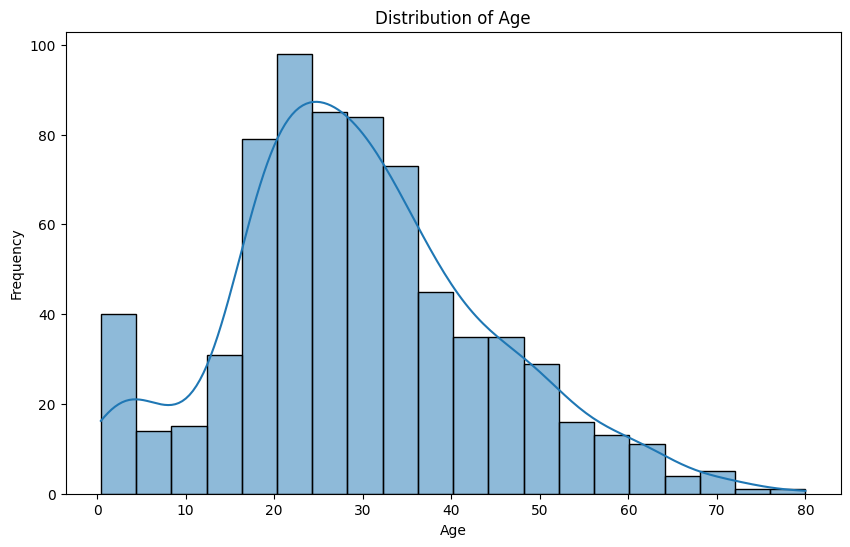

In [ ]:
#To address the Age question, I need top decide
#whether using the mean of median,
#the data distribution gives me the answer
#so I plot an histogram

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#the data is positively skewed, which means there are more old (20>=) passengers
# then young ones and the distibution is not simetrical, so I'm using the
# median
#first calculate the median
#2nd add that to the age column

median_age = df['Age'].median()
print(median_age)

#now fill in the missing values in the age column with the
#median





df['Age'].fillna(median_age, inplace=True)
df
#Checking there are no more missing values
#print(df['Age'].isnull().sum())



28.0


/tmp/ipython-input-753960256.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2
1,2,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,Yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2
4,5,No,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2nd,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,2
887,888,Yes,1st,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,2
888,889,No,3rd,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,2
889,890,Yes,1st,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,2


In [ ]:
#addressing the Embarked column missing values
#First, check how many missing values are in the colum

missing_embarked = df['Embarked'].isnull().sum()
print(f'The missing values in the Embarked column are: {missing_embarked}')

The missing values in the Embarked column are: 0



Let's analyze each scenario:

a. Cabin's missing value is a huge portion of the dataset:

Decision: It's reasonable to consider dropping the entire "Cabin" column if the missing values represent a substantial portion of the dataset.
Explanation: Since a significant portion of the "Cabin" data is missing, imputing these missing values may not provide meaningful information. Additionally, if the cabin number is not deemed critical for the analysis, dropping the column reduces complexity without sacrificing much information.

b. Age could be a good indicator of survival:

Decision: Impute missing age values based on a method that preserves the relationship between age and survival.
Explanation: Age is potentially an important predictor of survival, so it's valuable to retain this variable in the analysis. Dropping rows with missing age values could lead to a significant loss of data and potentially bias the analysis. Therefore, imputing missing age values using methods such as mean, median, or regression imputation while considering its relationship with survival would be beneficial.

c. We can't just assume someone's Port Embarkation:

Decision: Drop rows with missing values for "Port Embarkation" since it's not feasible to accurately impute this information.
Explanation: Unlike age, which could be reasonably imputed, it's challenging to accurately infer someone's port of embarkation. Since it's a categorical variable without a clear substitute and assuming values might introduce bias, dropping rows with missing values for "Port Embarkation" would be a prudent choice.
In summary, the decision to drop or fill in missing values depends on the nature of the variable, the extent of missingness, and the importance of the variable for the analysis. In these scenarios, dropping the "Port Embarkation" column due to its unimputable nature and considering imputation for "Age" while dropping the "Cabin" column due to its high missingness seem to be reasonable strategies.

#4. Check if your datatypes are correct

In [ ]:
#I didn't understand the purpose of the question,
#so I'm showing the data type per column
#looks good to me.

df.dtypes

,0
PassengerId,int64
Survived,object
Pclass,object
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


#5. Measures

##5.1 What is the average age of the passengers

In [ ]:
#I create a varaible called average_age
#and use the .mean() function

average_age = df['Age'].mean()
print(f'The average age of the passengers is: {average_age}')


The average age of the passengers is: 29.36158249158249


In [ ]:
#the average age has too many decimals,
# I asked Gemini how to have only 2 :)

print(f'The average age of the passengers is: {average_age:.2f}')

The average age of the passengers is: 29.36


##5.2 What is the maximum and minimum fare paid

In [ ]:
#I will describe column fare
#it will give me the basic
#statistical values including
#min and mx

#Javier's method

fare_analysis = df['Fare'].describe()
print(fare_analysis)
print(f'The minimum fare paid is: {fare_analysis[3]}')
print(f'The maximum fare paid is: {fare_analysis[7]}')

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
The minimum fare paid is: 0.0
The maximum fare paid is: 512.3292


/tmp/ipython-input-2123660364.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The minimum fare paid is: {fare_analysis[3]}')
/tmp/ipython-input-2123660364.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The maximum fare paid is: {fare_analysis[7]}')


In [ ]:
#Regular method
#Question to Nikko, the min fare value is 0.00
#how can I get the next value to get the actual
#minimum value?

min_max = df[['Fare']].agg(['min', 'max'])
print(min_max)

         Fare
min    0.0000
max  512.3292


##5.3 Are there more male or female?

In [ ]:
print('The passengers count breakdown is:')

sex_counts = df['Sex'].value_counts()
print(sex_counts)


The passengers count breakdown is:
Sex
male      577
female    314
Name: count, dtype: int64


##5.4 How many passengers are in the upper class, middle class, and lower class.

In [ ]:
pclass_counts = df['Pclass'].value_counts()
print(pclass_counts)

Pclass
3rd    491
1st    216
2nd    184
Name: count, dtype: int64


##5.5 How many passengers survived?

In [ ]:
print('The survival count is: :(')
survival_count = df['Survived'].value_counts()
print(survival_count)



The survival count is: :(
Survived
No     549
Yes    342
Name: count, dtype: int64
